In [1]:
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
% matplotlib inline
path = "yeast_cell_data/"
data = pd.read_csv(f"{path}yeast_cell_data.csv")

data.columns
data.dtypes
print("data shape: ",data.shape)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


data shape:  (50, 5)


raw_file                       cropped_file  alive  \
0  raw_files/20181115_110643.jpg  cropped_files/20181115_110643.jpg     12   
1  raw_files/20181115_110619.jpg  cropped_files/20181115_110619.jpg     10   
2  raw_files/20181115_110600.jpg  cropped_files/20181115_110600.jpg     11   
3  raw_files/20181115_110541.jpg  cropped_files/20181115_110541.jpg      7   
4  raw_files/20181115_110516.jpg  cropped_files/20181115_110516.jpg     10   

   dead            file_name  
0     1  20181115_110643.jpg  
1     0  20181115_110619.jpg  
2     1  20181115_110600.jpg  
3     1  20181115_110541.jpg  
4     0  20181115_110516.jpg

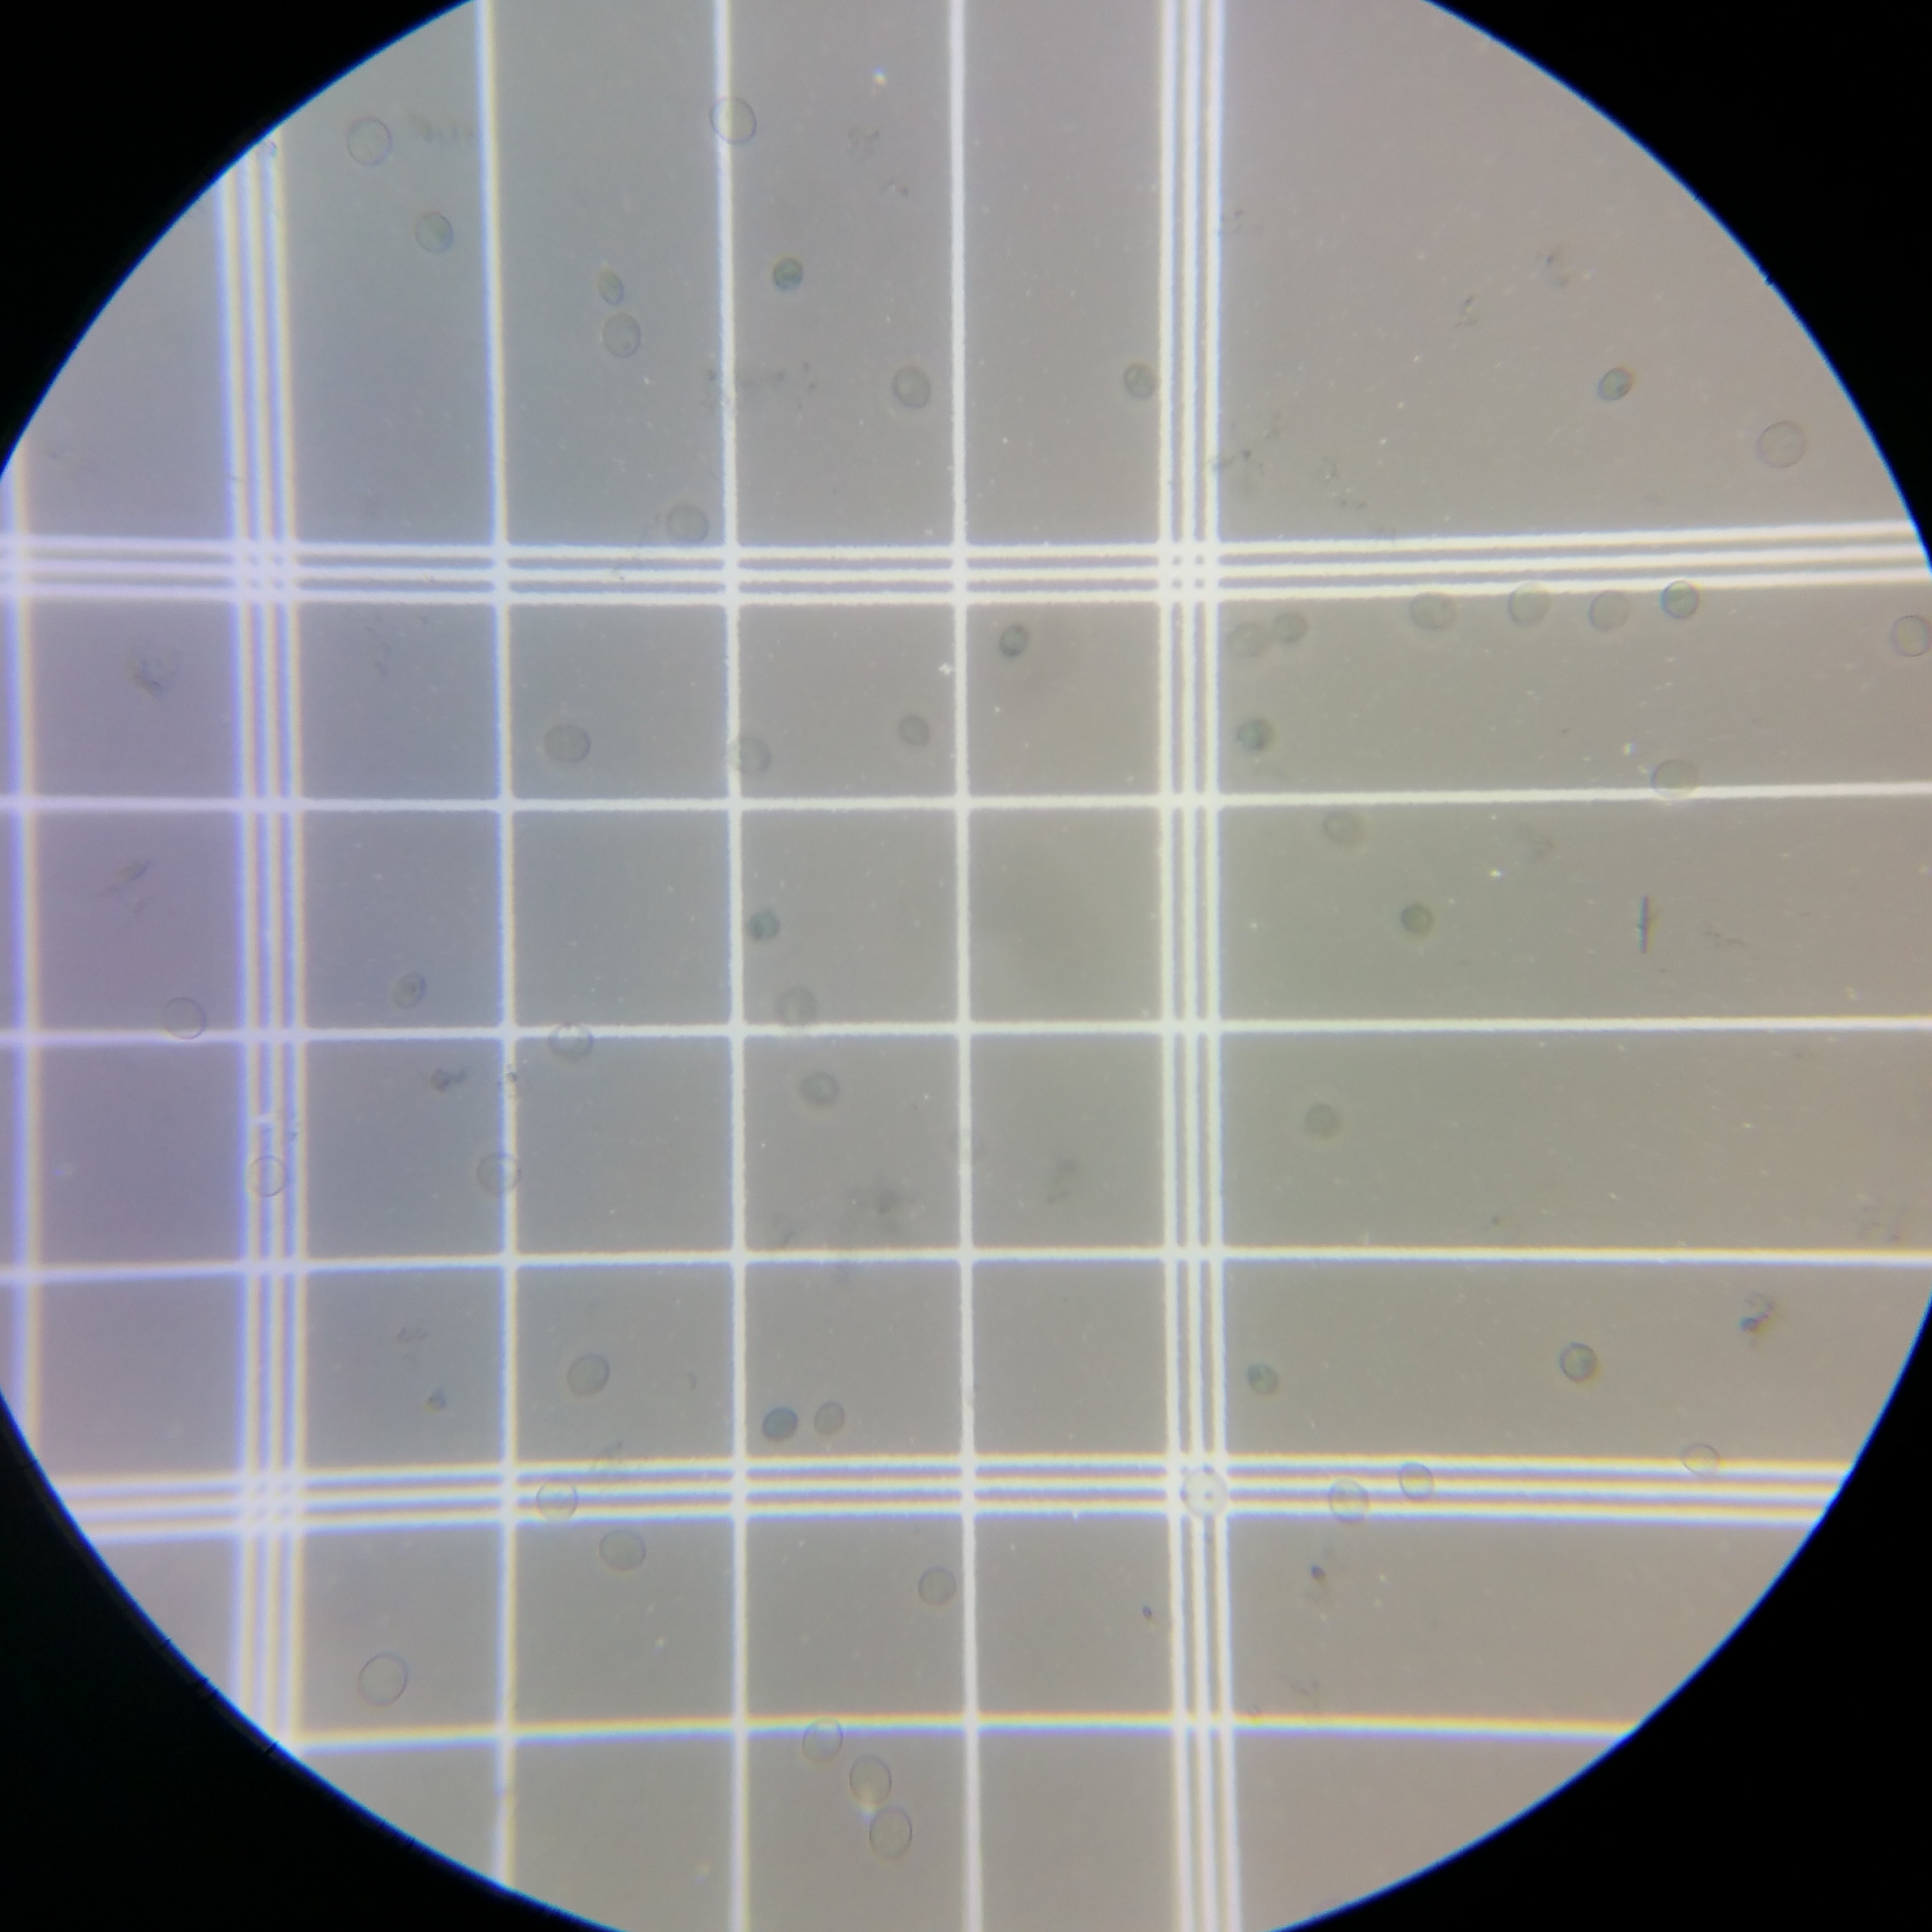

In [2]:
Image.open(path+data['raw_file'][0])

In [3]:
X_train, y_train, X_test, y_test = data.iloc[:40,0], (data.iloc[:40,2], data.iloc[:40,3]), data.iloc[40:,0], (data.iloc[40:,2], data.iloc[40:,3])

In [13]:
np.reshape(np.asarray(Image.open(path+X_train[2])),(2976*2976,3)).shape

(8856576, 3)

In [99]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import optimizers
from keras import losses

shape = np.asarray(Image.open(path+X_train[0]))
model = Sequential()
model.add(Conv2D(40, kernel_size=(3,3), input_shape=(40,2976*2976,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

In [100]:
train_data = []
for i in range(X_train.size):
    train_data.append(np.reshape(np.asarray(Image.open(path+X_train[i])),(2976*2976,3)))

In [101]:
train_data = np.asarray(train_data)
train_data.shape

(40, 8856576, 3)

In [102]:
train_data = train_data.reshape([-1,train_data.shape[0],train_data.shape[1],train_data.shape[2]])

In [103]:
model.compile(optimizer=optimizers.Adam(),loss=losses.mean_squared_error)

In [107]:
model.fit(train_data,y_train,epochs=100,verbose=1)

AttributeError: 'tuple' object has no attribute 'ndim'